## Additional script to add texts on images , make videos , 

### Directory of Images to Video

In [25]:
import cv2
import os

# Define the path to the directory containing the images
# img_dir = "images_displacement"
# img_dir = 'cropped_images_with_names/'
img_dir = '/Users/chorapallijayendrapraveenkumar/Downloads/cropped/'

# Get a list of all the image files in the directory
images = [img for img in os.listdir(img_dir) if img.endswith(".png")]

# Sort the list of images by their file names
images.sort()

# Get the height and width of the first image to set the output video parameters
frame = cv2.imread(os.path.join(img_dir, images[0]))
height, width, _ = frame.shape

# Define the video writer object
out = cv2.VideoWriter("/Users/chorapallijayendrapraveenkumar/Downloads/image_video_geometry.avi", cv2.VideoWriter_fourcc(*"MJPG"), 0.8, (width, height))

# Loop through all the images and add each one to the video
for image in images:
    frame = cv2.imread(os.path.join(img_dir, image))
    out.write(frame)

# Release the video writer object
out.release()

### Plot of mean displacement values of Ponte Morandi bridge using D-InSAR 

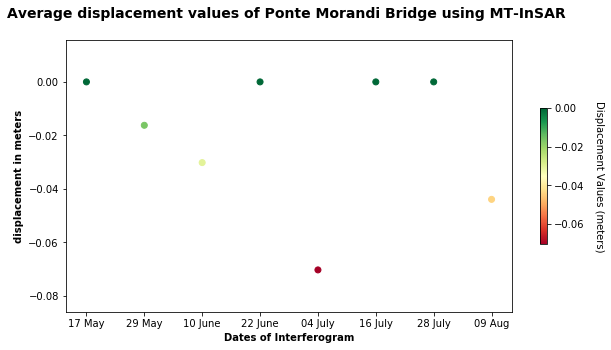

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as cbar
import numpy as np
import pandas as pd

# data
# dates = ['05 May-17 May', '17 May-29 May', '29 May-10 June', '10 June-22 June', '22 June-04 July', '04 July-16 July', '16 July-28 July', '28 July-09 Aug']
dates = ['17 May', '29 May', '10 June', '22 June', '04 July', '16 July', '28 July', '09 Aug']
displacement_values = [0, -0.01621095231, -0.03015310658, 0, -0.07024789758, 0, 0, -0.04389245998]

# plotting
fig = plt.figure(figsize=(10, 5))
scatter = plt.scatter(dates, displacement_values, c=displacement_values, cmap='RdYlGn')

# adding labels and title
plt.xlabel('Dates of Interferogram',fontsize = 10, fontweight='bold')
plt.ylabel('displacement in meters',fontsize = 10, fontweight='bold')
plt.title('Average displacement values of Ponte Morandi Bridge using MT-InSAR \n', fontsize = 14, fontweight='bold')

# Rotate the x-axis labels vertically
# plt.xticks(rotation=90)

# Add the colorbar as a ramp in the legend
cbar = plt.colorbar(scatter, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Displacement Values (meters)', rotation=270, labelpad=20)



# Show the plot
plt.savefig('Displacement_MT-InSAR.jpeg')
plt.show()



### Adding text to images

In [23]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open('/Users/chorapallijayendrapraveenkumar/Downloads/PineTools.com_files_2/04_subset_2_of_S1A_IW_SLC__1SDV_20180622T052725_20180622T052752_022465_026ED9_C660_split_Orb_Stack_ifg_flt_unw_dsp_TC_displacement_VV.png')
width, height = image.size 

draw = ImageDraw.Draw(image)

text = '22 June, 2018 - 04 July, 2018'
textwidth, textheight = draw.textsize(text)

margin = 10
x = 140
y = 15

font = ImageFont.truetype("/Library/Fonts/Arial.ttf", 20)

draw.text((x, y), text,font = font,fill =(255,0,0))

image.save('/Users/chorapallijayendrapraveenkumar/Downloads/cropped/05_22 June, 2018 - 04 July, 2018.png')

# optional parameters like optimize and quality
image.save('optimized.png', optimize=True, quality=50)